<a href="https://colab.research.google.com/github/corderosantiago97-dotcom/Challenge-Alura-store-SantiagoVallesillo/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



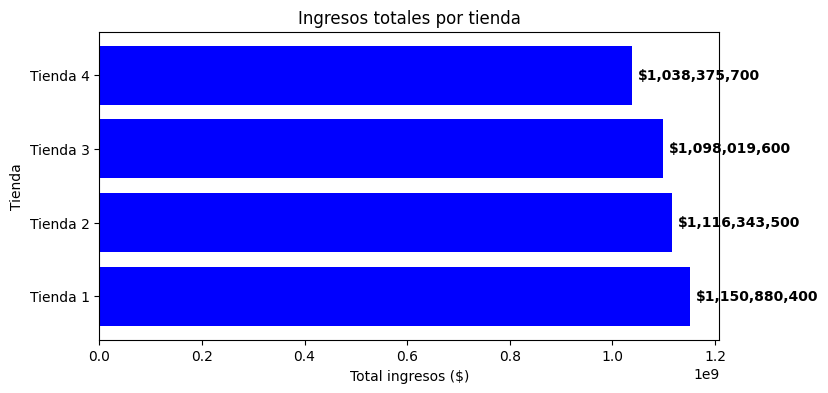

In [ ]:

# Datos de ejemplo
totalingresos1 = tienda['Precio'].sum()
totalingresos2 = tienda2['Precio'].sum()
totalingresos3 = tienda3['Precio'].sum()
totalingresos4 = tienda4['Precio'].sum()

datos_ingresos = [
    ('Tienda 1', totalingresos1),
    ('Tienda 2', totalingresos2),
    ('Tienda 3', totalingresos3),
    ('Tienda 4', totalingresos4)
]

df_ingresos = pd.DataFrame(datos_ingresos, columns=["Tienda", "Total Ingresos"])

# Gráfico horizontal
plt.figure(figsize=(8,4))
plt.barh(df_ingresos['Tienda'], df_ingresos['Total Ingresos'], color='blue')

# Agregar título y etiquetas
plt.title("Ingresos totales por tienda")
plt.xlabel("Total ingresos ($)")
plt.ylabel("Tienda")

# Agregar valores encima de cada barra
for index, value in enumerate(df_ingresos['Total Ingresos']):
    plt.text(value + (0.01*df_ingresos['Total Ingresos'].max()),  # pequeño desplazamiento a la derecha
             index,
             f"${value:,.0f}",
             va='center', ha='left', fontweight='bold')

plt.show()





# 2. Ventas por categoría

/tmp/ipython-input-1755144414.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x[i] - 1.5*width, df_top['Tienda 1'][i]+2, int(df_top['Tienda 1'][i]), ha='center', va='bottom')
/tmp/ipython-input-1755144414.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x[i] - 0.5*width, df_top['Tienda 2'][i]+2, int(df_top['Tienda 2'][i]), ha='center', va='bottom')
/tmp/ipython-input-1755144414.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by positio

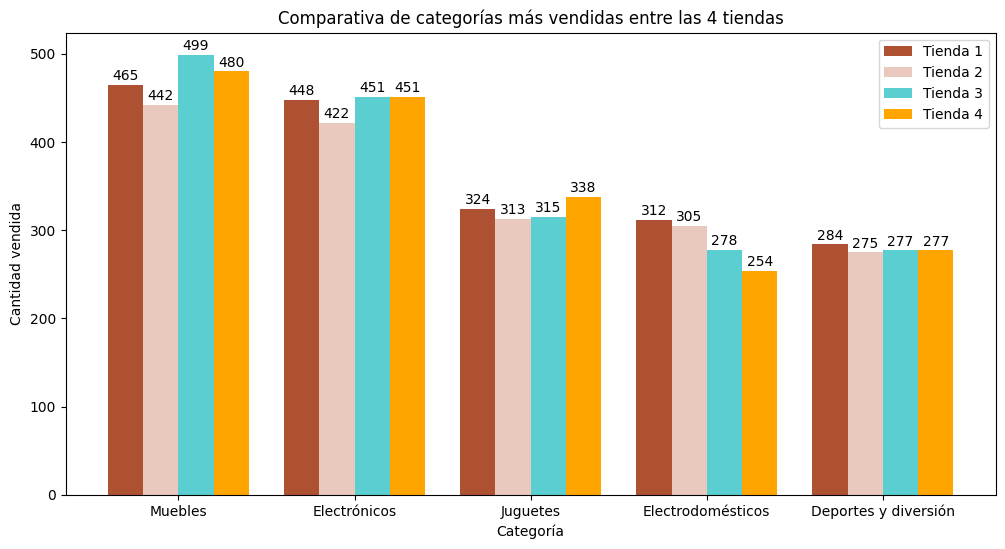

In [ ]:


# Supongamos que ya cargaste tus CSV
# tienda = pd.read_csv(url1)
# tienda2 = pd.read_csv(url2)
# tienda3 = pd.read_csv(url3)
# tienda4 = pd.read_csv(url4)

# Obtener cantidad de ventas por categoría en cada tienda
categoriasMasVendidas1 = tienda['Categoría del Producto'].value_counts()
categoriasMasVendidas2 = tienda2['Categoría del Producto'].value_counts()
categoriasMasVendidas3 = tienda3['Categoría del Producto'].value_counts()
categoriasMasVendidas4 = tienda4['Categoría del Producto'].value_counts()

# Crear un DataFrame con todas las tiendas y categorías
df_categorias = pd.DataFrame({
    'Tienda 1': categoriasMasVendidas1,
    'Tienda 2': categoriasMasVendidas2,
    'Tienda 3': categoriasMasVendidas3,
    'Tienda 4': categoriasMasVendidas4
}).fillna(0)  # si alguna categoría no existe en una tienda, poner 0

# Opcional: seleccionar solo las top 5 categorías más vendidas en total
df_categorias['Total'] = df_categorias.sum(axis=1)
df_top = df_categorias.sort_values('Total', ascending=False).head(5)
df_top = df_top.drop(columns='Total')

# Configuración del gráfico
categorias = df_top.index
x = np.arange(len(categorias))
width = 0.2

plt.figure(figsize=(12,6))

# Dibujar barras para cada tienda
plt.bar(x - 1.5*width, df_top['Tienda 1'], width, label='Tienda 1', color='#ae5132')
plt.bar(x - 0.5*width, df_top['Tienda 2'], width, label='Tienda 2', color='#e9c9be')
plt.bar(x + 0.5*width, df_top['Tienda 3'], width, label='Tienda 3', color='#5bced1')
plt.bar(x + 1.5*width, df_top['Tienda 4'], width, label='Tienda 4', color='orange')

# Mostrar valores encima de cada barra
for i in range(len(categorias)):
    plt.text(x[i] - 1.5*width, df_top['Tienda 1'][i]+2, int(df_top['Tienda 1'][i]), ha='center', va='bottom')
    plt.text(x[i] - 0.5*width, df_top['Tienda 2'][i]+2, int(df_top['Tienda 2'][i]), ha='center', va='bottom')
    plt.text(x[i] + 0.5*width, df_top['Tienda 3'][i]+2, int(df_top['Tienda 3'][i]), ha='center', va='bottom')
    plt.text(x[i] + 1.5*width, df_top['Tienda 4'][i]+2, int(df_top['Tienda 4'][i]), ha='center', va='bottom')

# Etiquetas y título
plt.xticks(x, categorias)
plt.xlabel("Categoría")
plt.ylabel("Cantidad vendida")
plt.title("Comparativa de categorías más vendidas entre las 4 tiendas")
plt.legend()
plt.show()


# 3. Calificación promedio de la tienda

Promedio Tienda 1: 3.98
Promedio Tienda 2: 4.04
Promedio Tienda 3: 4.05
Promedio Tienda 4: 4.0


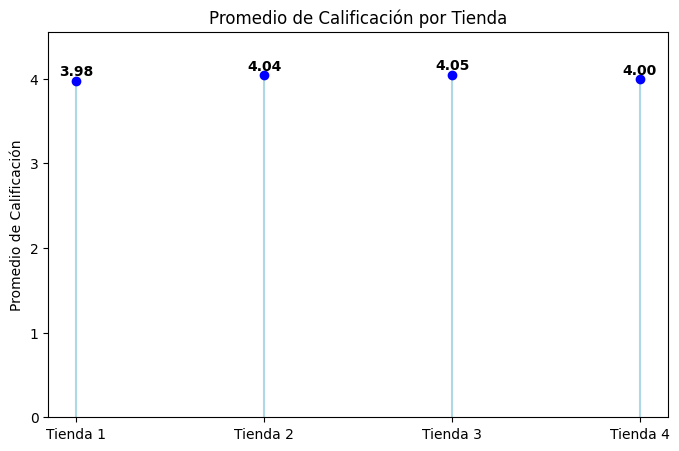

In [ ]:
# -----------------------------------------------------
# Calculamos el promedio de calificación de cada tienda
# -----------------------------------------------------
promedio_calificacion1 = round(tienda['Calificación'].dropna().mean(), 2)
promedio_calificacion2 = round(tienda2['Calificación'].dropna().mean(), 2)
promedio_calificacion3 = round(tienda3['Calificación'].dropna().mean(), 2)
promedio_calificacion4 = round(tienda4['Calificación'].dropna().mean(), 2)

# Mostramos los resultados
print("Promedio Tienda 1:", promedio_calificacion1)
print("Promedio Tienda 2:", promedio_calificacion2)
print("Promedio Tienda 3:", promedio_calificacion3)
print("Promedio Tienda 4:", promedio_calificacion4)



# -----------------------------------------------------
# Lista de promedios que calculaste antes
# -----------------------------------------------------
promedios = [
    promedio_calificacion1,
    promedio_calificacion2,
    promedio_calificacion3,
    promedio_calificacion4
]

# -----------------------------------------------------
# Nombres de las tiendas
# -----------------------------------------------------
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# -----------------------------------------------------
# Posiciones en el eje X
# -----------------------------------------------------
x = np.arange(len(tiendas))

# -----------------------------------------------------
# Crear figura
# -----------------------------------------------------
plt.figure(figsize=(8,5))

# -----------------------------------------------------
# Stem plot con 'markerfmt' para marcar el punto de arriba del tallo
# -----------------------------------------------------
plt.stem(x, promedios, linefmt='lightblue', markerfmt='bo', basefmt=' ')

# -----------------------------------------------------
# Etiquetas y título
# -----------------------------------------------------
plt.xticks(x, tiendas)
plt.ylabel("Promedio de Calificación")
plt.title("Promedio de Calificación por Tienda")

# -----------------------------------------------------
# Mostrar valores encima de cada tallo
# -----------------------------------------------------
for i, promedio in enumerate(promedios):
    plt.text(i, promedio + 0.02, f"{promedio:.2f}", ha='center', va='bottom', fontweight='bold')

# -----------------------------------------------------
# Ajustar límite superior del eje Y
# -----------------------------------------------------
plt.ylim(0, max(promedios) + 0.5)

# -----------------------------------------------------
# Mostrar gráfico
# -----------------------------------------------------
plt.show()


# 4. Productos más y menos vendidos

In [ ]:

Cantventas = tienda["Producto"].value_counts()

producto_mas_vendido = Cantventas.idxmax()
cantidad_mas_vendida = Cantventas.max()

producto_menos_vendido = Cantventas.idxmin()
cantidad_menos_vendida = Cantventas.min()

Cantventas2 = tienda2["Producto"].value_counts()

producto_mas_vendido2 = Cantventas2.idxmax()
cantidad_mas_vendida2 = Cantventas2.max()

producto_menos_vendido2 = Cantventas2.idxmin()
cantidad_menos_vendida2 = Cantventas2.min()

Cantventas3 = tienda3["Producto"].value_counts()

producto_mas_vendido3 = Cantventas3.idxmax()
cantidad_mas_vendida3 = Cantventas3.max()

producto_menos_vendido3 = Cantventas3.idxmin()
cantidad_menos_vendida3 = Cantventas3.min()

Cantventas4 = tienda4["Producto"].value_counts()

producto_mas_vendido4 = Cantventas4.idxmax()
cantidad_mas_vendida4 = Cantventas4.max()

producto_menos_vendido4 = Cantventas4.idxmin()
cantidad_menos_vendida4 = Cantventas4.min()

print("Producto más vendido:", producto_mas_vendido, "-", cantidad_mas_vendida, "ventas")
print("Producto menos vendido:", producto_menos_vendido, "-", cantidad_menos_vendida, "ventas")
print("Producto más vendido:", producto_mas_vendido2, "-", cantidad_mas_vendida2, "ventas")
print("Producto menos vendido:", producto_menos_vendido2, "-", cantidad_menos_vendida2, "ventas")
print("Producto más vendido:", producto_mas_vendido3, "-", cantidad_mas_vendida3, "ventas")
print("Producto menos vendido:", producto_menos_vendido3, "-", cantidad_menos_vendida3, "ventas")
print("Producto más vendido:", producto_mas_vendido4, "-", cantidad_mas_vendida4, "ventas")
print("Producto menos vendido:", producto_menos_vendido4, "-", cantidad_menos_vendida4, "ventas")




Producto más vendido: Microondas - 60 ventas
Producto menos vendido: Auriculares con micrófono - 33 ventas
Producto más vendido: Iniciando en programación - 65 ventas
Producto menos vendido: Juego de mesa - 32 ventas
Producto más vendido: Kit de bancas - 57 ventas
Producto menos vendido: Bloques de construcción - 35 ventas
Producto más vendido: Cama box - 62 ventas
Producto menos vendido: Guitarra eléctrica - 33 ventas


# 5. Envío promedio por tienda

In [ ]:
tienda["tienda"]="tienda1"
tienda2["tienda"]="tienda2"
tienda3["tienda"]="tienda3"
tienda4["tienda"]="tienda4"

tiendas = pd.concat([tienda, tienda2, tienda3, tienda4])

costo_envio_promedio = tiendas.groupby("tienda")["Costo de envío"].mean()

costo_envio_promedio = costo_envio_promedio.round(2)

print(costo_envio_promedio)

tienda
tienda1    26018.61
tienda2    25216.24
tienda3    24805.68
tienda4    23459.46
Name: Costo de envío, dtype: float64
